# **Importing the packages for data analysis**

At first sight, we will use four main packages: pandas,numpy, matplotlib and seaborn. Let's import these packages using the keyword import. We will change the name from pandas to pd,numpy to np,matplotlib to pltand seaborn to sns, using the keyword as.

We will be using the nltk, sklearn, collections and wordcloud packages for processing our text component. While we analyze the text, we will be using sklearn package again to model our text features.

In [3]:
! pip install nltk
! pip install wordcloud

In [4]:
# General packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# NLP packages
import nltk
from nltk import word_tokenize # to tokenize sentences to have words
# # counting the repetition of the frequency of each of the word 
from sklearn.feature_extraction.text import CountVectorizer
# # Generally a vectorizer to change a dimentionless base of the words 
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud

# Modeling packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 14, 6
plt.style.use('ggplot')

We will be working with a .csv file that contains information about tens of thousands of customers writing reviews on Amazon products every day. Each review contains textual feedback along with a 1-to-5 star rating system (1 being least satisfied and 5 being most satisfied). In this way, the following attributes are available in the data:



1.   **ProductId (categorical):** ID of the referenced product by the customer.

2.   **UserId (categorical):** registered user ID.

3.   **ProfileName (text):** registered user profile name.

4.   **HelpfulnessNumerator (numerical):** number of users who found the review helpful.

5.   **HelpfulnessDenominator (numerical):** Number of users who voted whether the review was helpful or not.

6.   **Score (ordinal):** rating between 1 and 5.

7.   **Time (numerical):** timestamp of the review.

8.   **Summary (text):** brief summary of the review.

9.   **Text (text):** text of the review.



# **Reading and performing basic analysis of the data**

As usual the first step is to read the available data and perform some high-level analysis on it:

In [5]:
df = pd.read_csv('https://media.githubusercontent.com/media/juliandariomirandacalle/NLP_Notebooks/master/01-Introduction_NLP/Customer_Reviews.csv'
)
df.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Let's look at the distribution of number of words per review. We will do this by applying a lambda function that splits each complete review by spaces, Which will give us the borad words:

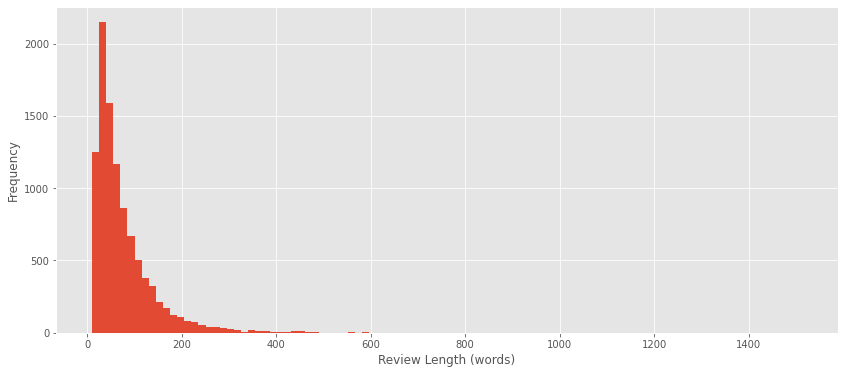

In [6]:
# Getting the number of words by splitting them by a space 
words_per_review = df.Text.apply(lambda x: len(x.split(" ")))
words_per_review.hist(bins = 100)
plt.xlabel('Review Length (words)')
plt.ylabel('Frequency')
plt.show()

In [7]:
 print('Average words:', words_per_review.mean())
 print('Skewness:', words_per_review.skew()) # how a symmetrics a data is explained by Skewness

Average words: 77.9028
Skewness: 4.612459483340116


We can see that the number of words per user review is highly positive skewed with mean of 77, which means that on average, user reviews have 77 words.

Let's also look at the distribution of ratings:

In [8]:
percent_val = 100 * df['Score'].value_counts()/len(df)
percent_val

5    61.83
4    14.33
1     9.32
3     8.62
2     5.90
Name: Score, dtype: float64

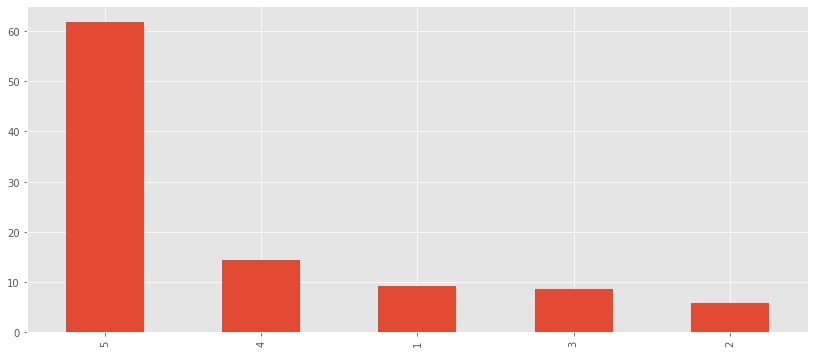

In [9]:
percent_val.plot.bar()
plt.show;

The distribution is quite skewed, with a giant number of 5a and very few 3s, 2s, and 1s.

# **Text visualization using word clouds (word clouds )**

As visualization is crucial for numerical data, it is also important for text data. However, the text does not lend itself to histogram charts or scatterplots, as numerical data does. In such cases, the word clouds are a common and very useful tool to appreciate the text distribution.

To make a word cloud of the string values of the Seires data['Text'], we are going to import the WordCloud package (if it is not installed, you can proceed to install it with pip install wordcloud) and join all the text with the .join() method:

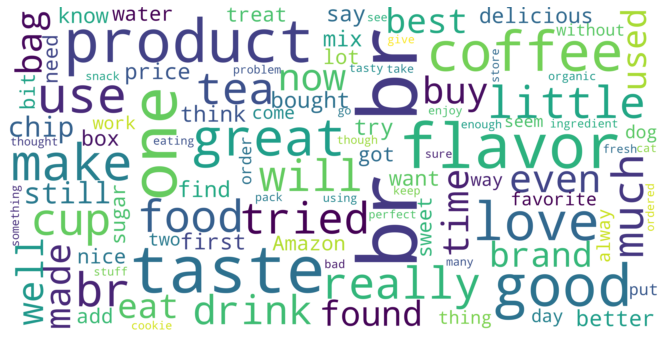

In [10]:
word_cloud_text = ''.join(df['Text'])

wordcloud = WordCloud(max_font_size=100, # Maximum font size for the largest word
                      max_words=100, # The maximum number of words
                      background_color="white", # Background color for the word cloud image
                      scale = 10, # Scaling between computation and drawing
                      width=800, # Width of the canvas
                      height=400 # Height of the canvas
                     ).generate(word_cloud_text)

plt.figure()
plt.imshow(wordcloud, 
           interpolation="bilinear") # to make the displayed image appear more smoothly
plt.axis("off")
plt.show()

The word cloud indicates that many of the reviews talk about food-related things - coffee, flavor, food, taste, drink. We also see some positive words like good, love, best, as well as not desired ones such as br (line break), many (determiner) and something (adverb).

# **Standardizing the ratings for sentiment analysis (5 mts)**

For the purposes of sentiment analysis, we will convert all of the ratings into binary values using the follow rule:

*   Ratings of 4 or 5 will get mapped to 1 and will be reltead to positive reviews
*   Ratings of 1 or 2 will get mapped to 0 and will be related to negative reviews
*   Ratings of 3 will get removed since they will represent neutral reviews.

In [11]:
# Mapping the rating 
df['Sentiment_rating'] = np.where(df.Score > 3,1,0)  # np.where(condition, [x, y])

## Removing netural review
df = df[df.Score != 3]

# Printing the counts of each class
df['Sentiment_rating'].value_counts()

1    7616
0    1522
Name: Sentiment_rating, dtype: int64

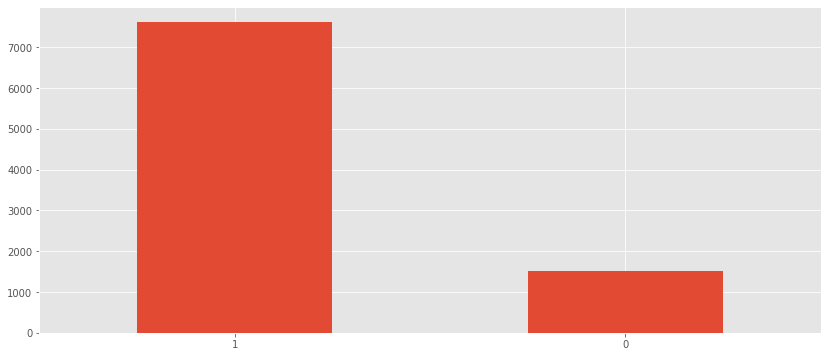

In [12]:
df.Sentiment_rating.value_counts().plot.bar()
plt.xticks(rotation=0)
plt.show()

There is a class imbalance that we are going to handle by defining robust metrics.

# **Pre-processing**

As discussed previously, text preprocessing and normalization is crucial before building a proper NLP model. Some of the important steps are:

1. Converting words to lower/upper case
2. Removing special characters
3. Removing stopwords and high/low-frequency words
4. Stemming/lemmatization

### **1. Converting words to lower/upper case**

Let's start by converting all of the words into a consistent case format, say lowercase:

In [13]:
df['reviews_text_new'] = df['Text'].str.lower()

In the following code cell we analyze the number of unique words that are found in reviews before and after applying this step. This process of extracting individual words is called word tokenization, and can be run using the word_tokenize function in the nltk package:

In [15]:
from nltk import word_tokenize
nltk.download('punkt')

# Word tokenization example:
word_tokenize("DPhi Bootcamp rules. It is awesome :D")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['DPhi', 'Bootcamp', 'rules', '.', 'It', 'is', 'awesome', ':', 'D']

In [16]:
# for reviews not converted to time lower case
token_lists = [word_tokenize(each) for each in df['Text']]
tokens =[item for sublist in token_lists for item in sublist]
print("Number of unique token than: ", len(set(tokens)))

# For reviews converted to lower case
token_lists_lower = [word_tokenize(each) for each in df['reviews_text_new']]
tokens_lower = [item for sublist in token_lists_lower for item in sublist]
print("Number of unique token now: ", len(set(tokens_lower)))

Number of unique token than:  27899
Number of unique token now:  22865


The number of tokens has gone down by ~18% just from normalizing the corpus.

Removing special characters is a subjective call, especially in cases like this one. People often use special characters to express their emotions and might leave a review like 'This product is the worst!!!', while a positive review could be like 'This product is the best. Loved it!'. Here, the presence of exclamation marks clearly indicates something about the underlying sentiment, so removing them may well not be a good idea.

On the other hand, removing non-emotionally charged punctuation such as commas, periods, and semicolons is likely safe.

### **2. Removing special characters**

For the sake of simplicity, we will proceed by removing all of the special characters; however, it pays to keep in mind that this is something to revisit depending on the results we get later. The following gives a list of all the special characters in our dataset:

In [17]:
### Selecting non alpha numeric charactes that are not spaces
spl_chars = df['reviews_text_new'].apply(lambda review: 
                                                     [char for char in list(review) if not char.isalnum() and char != ' '])

## Getting list of list into a single list
flat_list = [item for sublist in spl_chars for item in sublist]

## Unique special characters
set(flat_list)

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 ']',
 '^',
 '_',
 '`',
 '{',
 '}',
 '~',
 '§',
 '®'}

Let's remove these special characters from the reviews by applying a regular expression:

In [18]:
review_backup = df['reviews_text_new'].copy()
df['reviews_text_new'] = df['reviews_text_new'].str.replace(r'[^A-Za-z0-9 ]+', ' ')

Let's decomose the regular expression [^A-Za-z0-9 ]+:



*   [ ]: match any character inside the list defined by the square brackets, including the space character ' '
*    ^: start of the line

*   A-Z: accept english upper case characters from A to Z
*   a-z: accept english lower case characters from a to z

*   0-9: accept single number characters from 0 to 9

We can see how our reviews change after removing these:

In [19]:
print("- Old Review -")
print(review_backup.values[6])
print("\n- New Review -")
print(df['reviews_text_new'][6])

- Old Review -
this saltwater taffy had great flavors and was very soft and chewy.  each candy was individually wrapped well.  none of the candies were stuck together, which did happen in the expensive version, fralinger's.  would highly recommend this candy!  i served it at a beach-themed party and everyone loved it!

- New Review -
this saltwater taffy had great flavors and was very soft and chewy   each candy was individually wrapped well   none of the candies were stuck together  which did happen in the expensive version  fralinger s   would highly recommend this candy   i served it at a beach themed party and everyone loved it 


The number of unique tokens has dropped further:

In [20]:
token_lists = [word_tokenize(each) for each in df['Text']]
tokens = [item for sublist in token_lists for item in sublist]
print("Number of unique tokens then: ",len(set(tokens)))

token_lists = [word_tokenize(each) for each in df['reviews_text_new']]
tokens = [item for sublist in token_lists for item in sublist]
print("Number of unique tokens now: ",len(set(tokens)))

Number of unique tokens then:  27899
Number of unique tokens now:  18039


### **3. Stopwords and high/low frequency words**

As discussed before, stopwords naturally occur very frequently in the English language without adding any context specific insights. It makes sense to remove them. Let's first review what languages are available in the nltk package:

In [22]:
from nltk.corpus import stopwords
nltk.download('stopwords')

print('Available languages for NLTK v.3.4.5: ')
print(stopwords.fileids())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Available languages for NLTK v.3.4.5: 
['arabic', 'azerbaijani', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


Let's now review the list of English stopwords:

In [23]:
noise_words = []
eng_stop_words = stopwords.words('english')
eng_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
stop_words = set(eng_stop_words)
without_stop_words = []
stopword = []
sentence = df['reviews_text_new'][0]
words = nltk.word_tokenize(sentence)

for word in words:
    if word in stop_words:
        stopword.append(word)
    else:
        without_stop_words.append(word)

print('-- Original Sentence --\n', sentence)
print('\n-- Stopwords in the sentence --\n', stopword)
print('\n-- Non-stopwords in the sentence --\n', without_stop_words)

-- Original Sentence --
 i have bought several of the vitality canned dog food products and have found them all to be of good quality  the product looks more like a stew than a processed meat and it smells better  my labrador is finicky and she appreciates this product better than  most 

-- Stopwords in the sentence --
 ['i', 'have', 'of', 'the', 'and', 'have', 'them', 'all', 'to', 'be', 'of', 'the', 'more', 'a', 'than', 'a', 'and', 'it', 'my', 'is', 'and', 'she', 'this', 'than', 'most']

-- Non-stopwords in the sentence --
 ['bought', 'several', 'vitality', 'canned', 'dog', 'food', 'products', 'found', 'good', 'quality', 'product', 'looks', 'like', 'stew', 'processed', 'meat', 'smells', 'better', 'labrador', 'finicky', 'appreciates', 'product', 'better']


Let's see how we omit these stopwords from our reviews:

In [25]:
def stopwords_removal(stop_words, sentence):
    return [word for word in nltk.word_tokenize(sentence) if word not in stop_words]

df['reviews_text_nonstop'] = df['reviews_text_new'].apply(lambda row: stopwords_removal(stop_words, row))
df[['reviews_text_new','reviews_text_nonstop']]

,reviews_text_new,reviews_text_nonstop
0,i have bought several of the vitality canned d...,"[bought, several, vitality, canned, dog, food,..."
1,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, jumbo, salted, pea..."
2,this is a confection that has been around a fe...,"[confection, around, centuries, light, pillowy..."
3,if you are looking for the secret ingredient i...,"[looking, secret, ingredient, robitussin, beli..."
4,great taffy at a great price there was a wid...,"[great, taffy, great, price, wide, assortment,..."
...,...,...
9995,we switched from the advance similac to the or...,"[switched, advance, similac, organic, product,..."
9996,like the bad reviews say the organic formula ...,"[like, bad, reviews, say, organic, formula, co..."
9997,i wanted to solely breastfeed but was unable t...,"[wanted, solely, breastfeed, unable, keep, sup..."
9998,i love the fact that i can get this delieved t...,"[love, fact, get, delieved, house, delievy, ch..."


### **4. Stemming & lemmatization**

Now we are ready for the last part of our pre-processing - **stemming & lemmatization**.

Different forms of a word often communicate essentially the same meaning. For example, there’s probably no difference in intent between a search for shoe and a search for shoes. The same word may also appear in different tenses; e.g. "run", "ran", and "running". These syntactic differences between word forms are called **inflections**. In general, we probably want to treat inflections identically when extracting features from the text.

Sometimes this process is nearly-reversible and quite safe (e.g. replacing verbs with their infinitive, so that "run", "runs", and "running" all become "run"). Other times it is a bit dangerous and context-dependant (e.g. replacing superlatives with their base form, so that "good", "better", and "best" all become "good"). The more aggressive you are, the greater the potential rewards and risks. For a very aggressive example, you might choose to replace "Zeus" and "Jupiter" with "Zeus" only; this might be OK if you are summarizing myths, confusing if you are working on astronomy, and disastrous if you are working on comparative mythology.

We won't get into the details of the differences between stemming, lemmatization and other types of text normalization here. Please review the following resource for detailed explanation: https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html.

**Stemming** works by cutting off the end or the beginning of the word, taking into account a list of common prefixes and suffixes that can be found.

**Lemmatization** takes into consideration the morphological analysis of the words. So lemmatization considers the grammar of the word and tries to find the root word instead of just getting to the root word by brute force methods.

In [26]:
from nltk.stem import PorterStemmer, LancasterStemmer # Common stemmers
from nltk.stem import WordNetLemmatizer # Common Lematizer
nltk.download('wordnet')
from nltk.corpus import wordnet

porter = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [27]:
print("Lancaster Stemmer")  # (gives mean selection of word)
print(lancaster.stem("trouble"))
print(lancaster.stem("troubling"))
print(lancaster.stem("troubled"))

# Provide a word to be lemmatized 
print("WordNet Lemmatizer") # (gives root of the word)
print(lemmatizer.lemmatize("trouble", wordnet.NOUN))
print(lemmatizer.lemmatize("troubling", wordnet.VERB))
print(lemmatizer.lemmatize("troubled", wordnet.VERB))

Lancaster Stemmer
troubl
troubl
troubl
WordNet Lemmatizer
trouble
trouble
trouble


It can be seen that we get a meaning root word from Lemmatizer while Stemmer just cuts out and extracts the first important part of the word.

# **Building a machine learning model**
Now we have cleaned-up versions of two very important pieces of data – the actual review text and its corresponding sentiment rating:

In [28]:
df[['Text','Score','Sentiment_rating']].head(5)

,Text,Score,Sentiment_rating
0,I have bought several of the Vitality canned d...,5,1
1,Product arrived labeled as Jumbo Salted Peanut...,1,0
2,This is a confection that has been around a fe...,4,1
3,If you are looking for the secret ingredient i...,2,0
4,Great taffy at a great price. There was a wid...,5,1


The independent variables or model features are derived from the review text. Previously, we discussed how we can use n-grams to create features, and specifically how bag-of-words is the simplest interpretation of these n-grams, disregarding order and context entirely and only focusing on frequency/count. Let's use that as a starting point.

Conversely, reading each of the reviews, it is clear that, for instance, "good" is mentioned in context like "not as good" or "sounds good". This indicates that in the world of text we cannot go by single words (also called 1-grams) alone. The context of the sentence or the surrounding words at least are very much necessary to understand the sentiment of a sentence.

# **n-grams**

Since 1-grams are sometimes insufficient to understand the significance of certain words in our text, it is natural to consider blocks of words, or **n-grams**.

The simplest version of the n-gram model, for n>1, is the **bigram** model, which looks at pairs of consecutive words. For example, the sentence "The quick brown fox jumps over the lazy dog" would have tokens "the quick", "quick brown",..., "lazy dog". The following image (source: http://recognize-speech.com/language-model/n-gram-model/comparison) explains this concept:


![title](https://images.deepai.org/glossary-terms/867de904ba9b46869af29cead3194b6c/8ARA1.png)

This has obvious advantages and disadvantages over looking at words individually:

*   **Advantages:**

1.   Retains the structure of the overall document, and
2.   Paves the way for analyzing words in context

*   **Disadvantages:**

1.   The dimension is vastly larger

In practice, this last challenge can be truly daunting. As an example, War and Peace has 3 million characters, which translates to several hundred thousand 1-grams (words). If you consider that the set of all possible bigrams can be as large as the square of the number of 1-grams, this gets us to a **hundred billion possible bigrams!** If classical ML techniques are not suitable for training on 3 million characters, how can they possibly deal with a hundred billion dimensions?

For this reason, it is often prudent to start by extracting as much value out of 1-grams as possible, before working our way up to more complex structures.

Let's look at an example of extracting n-grams over a proposed sentence:

Let's look at an example of extracting n-grams over a proposed sentence:

In [29]:
from nltk import ngrams

sentence = 'A bird in the hand worths two in the bush'

for n in range(1, 6):
    print(str(n) + '-grams:\n', list(ngrams(sentence.split(), n)))

1-grams:
 [('A',), ('bird',), ('in',), ('the',), ('hand',), ('worths',), ('two',), ('in',), ('the',), ('bush',)]
2-grams:
 [('A', 'bird'), ('bird', 'in'), ('in', 'the'), ('the', 'hand'), ('hand', 'worths'), ('worths', 'two'), ('two', 'in'), ('in', 'the'), ('the', 'bush')]
3-grams:
 [('A', 'bird', 'in'), ('bird', 'in', 'the'), ('in', 'the', 'hand'), ('the', 'hand', 'worths'), ('hand', 'worths', 'two'), ('worths', 'two', 'in'), ('two', 'in', 'the'), ('in', 'the', 'bush')]
4-grams:
 [('A', 'bird', 'in', 'the'), ('bird', 'in', 'the', 'hand'), ('in', 'the', 'hand', 'worths'), ('the', 'hand', 'worths', 'two'), ('hand', 'worths', 'two', 'in'), ('worths', 'two', 'in', 'the'), ('two', 'in', 'the', 'bush')]
5-grams:
 [('A', 'bird', 'in', 'the', 'hand'), ('bird', 'in', 'the', 'hand', 'worths'), ('in', 'the', 'hand', 'worths', 'two'), ('the', 'hand', 'worths', 'two', 'in'), ('hand', 'worths', 'two', 'in', 'the'), ('worths', 'two', 'in', 'the', 'bush')]


# **Bag-of-words**
The bag-of-words procedure falls under a broader category of techniques known as **count-based representations**. These are techniques to analyze documents by indicating how frequently certain types of structures occur throughout.

Let's start with 1-grams (words). The simplest type of information would be whether a particular word occurs in particular documents. This leads to **word-document co-occurrence matrices**, where the (W,X) entry of the word-document matrix is set to 1 if word W occurs in document X, and 0 otherwise.

Let's create a word-document co-occurrence matrix for our set of reviews using the CountVectorizer class that automatically accounts for certain preprocessing steps like removing stopwords, stemming, creating n-grams, and word tokenization:

In [30]:
# The following code creates a word-document matrix. (is also parce metric )
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(df['reviews_text_new'])
df1 = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df1.head()

,00,000,0003,000kwh,002,008,0100,0174,02,03,0303,032,03510,04,042608460503,0472066978,04830,05,06,062,07,0738551856,09,090,0g,0mg,0xk6hzpjrkaed855hewp,0z,10,100,1000,100ml,100s,100x,101,103,105,108,10g,10lb,...,zany,zap,zapp,zareba,zeal,zealand,zen,zero,zest,zesty,zevia,zhena,zico,ziggies,zilch,zin,zinc,zinfandels,zing,zinging,zip,ziploc,ziplock,zipper,zippy,zito,ziwipeak,zn,zojirushi,zola,zomg,zon,zoo,zoom,zotz,zucchini,zuke,zukes,zupas,zuppa
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Let's use this to create a bag of words from the reviews, excluding the noise words we identified earlier:

In [31]:
### Creating a python object of the class CountVectorizer

bow_counts = CountVectorizer(tokenizer= word_tokenize, # type of tokenization
                             stop_words=noise_words, # List of stopwords
                             ngram_range=(1,1)) # number of n-grams

bow_data = bow_counts.fit_transform(df['reviews_text_new'])
bow_data

<9138x18039 sparse matrix of type '<class 'numpy.int64'>'
	with 493450 stored elements in Compressed Sparse Row format>

We can see that a sparse matrix of 9138 observations (number of rows of the reviews_text_new series) has been built, and 17679 columns corresponding to the features extracted by means of the representation of the 1-gram count of the user reviews.

Once the bag of words is prepared, the dataset should be divided into training and test sets:

In [32]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow_data, # Features
                                                                    df['Sentiment_rating'], # Target variable
                                                                    test_size = 0.2, # 20% test size
                                                                    random_state = 0) # random state for replication purposes 

In [33]:
y_test_bow.value_counts()/y_test_bow.shape[0]

1    0.847921
0    0.152079
Name: Sentiment_rating, dtype: float64

The test data contains 84% positive sentiment reviews. So, if we were to naively classify all reviews as positive, then our model would achieve an accuracy of 84%. Therefore, this is the baseline that any model we create must beat. We have an imbalance in the classes. However, we will skip the handling class imbalance processes to focus on NLP modeling. However, as an intermediate step, techniques such as SMOTE, sub-sampling or oversampling can be applied.

## **Applying logistic regression**
Let's train the model on our training data and run the resulting model on our test data:

In [34]:
### Training the model 
lr_model_all = LogisticRegression() # Logistic regression
lr_model_all.fit(X_train_bow, y_train_bow) # Fitting a logistic regression model

## Predicting the output
test_pred_lr_all = lr_model_all.predict(X_test_bow) # Class prediction

## Calculate key performance metrics
print("F1 score: ", f1_score(y_test_bow, test_pred_lr_all))

F1 score:  0.9526854219948849


Let's modify the set of features in the model to include bigrams, trigrams, and 4-grams:

In [35]:
### Changes with respect to the previous code
### 1. Increasing the n-grams from just having 1-gram to (1-gram, 2-gram, 3-gram, and 4-gram)
### 2. Including the stopwords in the bag of words features

bow_counts = CountVectorizer(tokenizer= word_tokenize,
                             ngram_range=(1,4))

bow_data = bow_counts.fit_transform(df.reviews_text_new)

In [36]:
 # Notice the increase in features with inclusion of n-grams
bow_data

<9138x1261413 sparse matrix of type '<class 'numpy.int64'>'
	with 2530528 stored elements in Compressed Sparse Row format>

In [37]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow_data,
                                                                    df['Sentiment_rating'],
                                                                    test_size = 0.2,
                                                                    random_state = 0)

In [38]:
# Defining and training the model
lr_model_all_new = LogisticRegression(max_iter = 200)
lr_model_all_new.fit(X_train_bow, y_train_bow)

# Predicting the results
test_pred_lr_all = lr_model_all_new.predict(X_test_bow)

print("F1 score: ", f1_score(y_test_bow,test_pred_lr_all))

F1 score:  0.9541745134965474


The F1-score has jumped slightly. This is an example of what simple hyperparameter tuning and input feature modification can do to the overall performance. We can even get interpretable features from this in terms of what contributed the most to positive and negative sentiment:

In [39]:
lr_weights = pd.DataFrame(list(zip(bow_counts.get_feature_names(), # ge tall the n-gram feature names
                                   lr_model_all_new.coef_[0])), # get the logistic regression coefficients
                          columns= ['words','weights']) # defining the colunm names

lr_weights.sort_values(['weights'], ascending = False)[:15] # top-15 more important features for positive reviews

,words,weights
448809,great,1.327825
305794,delicious,0.952226
810997,perfect,0.838265
438773,good,0.831878
1023733,the best,0.820454
358331,excellent,0.820368
171393,best,0.792752
639088,love,0.783723
709971,nice,0.769280
930961,smooth,0.637403


In [40]:
lr_weights.sort_values(['weights'], ascending = False)[-15:] # top-15 more important features for negative reviews

,words,weights
1241695,worst,-0.542737
1175374,very disappointed,-0.558068
1206112,were,-0.564819
874505,return,-0.568158
143979,away,-0.573385
959625,stick,-0.585494
144964,awful,-0.593931
1193585,waste,-0.612413
317336,disappointing,-0.613688
982546,t,-0.674788


# **Conclusions**

In this case, we cleaned up and featurized an Amazon reviews dataset and built some classification models on these featurizations to predict sentiment. We saw that bag-of-words. Through increase the set of n-grams we used from 1-grams to up to 4-grams, we were able to get our logistic regression model accuracy up to 95%.